In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
%matplotlib inline

# 1. Leland Model

In [2]:
# parameters
r = 0.05  # risk-free rate
q = 0.01  # dividend yield
σ = 0.2  # volatility
τ = 0.2  # tax rate
α = 0.3  # bankruptcy cost

# lambda
λ_ = (-(r - q - σ**2 / 2) - np.sqrt((r - q - σ**2 / 2)**2 + 2 * σ**2 * r)) / σ**2

# Coupon rate
C = 2

In [3]:
# Leland's model
def debtValue(V, V_B, C):
    return (C / r) * (1 - (V / V_B)**λ_) + (1 - α) * V_B * (V / V_B)**λ_


def taxBenefit(V, V_B, C):
    return τ * (C / r) * (1 - (V / V_B)**λ_)


def bankruptcyCost(V, V_B):
    return α * V_B * (V / V_B)**λ_


def totalValue(V, V_B, C):
    return V + taxBenefit(V, V_B, C) - bankruptcyCost(V, V_B)


def equityValue(V, V_B, C):
    return totalValue(V, V_B, C) - debtValue(V, V_B, C)

(a) Setting $ V_B = 30$, plot the equity value given in slide 23 for V ∈ [10, 100].
Comment on how to choose the optimal $V_B$ such that equity is maximized.

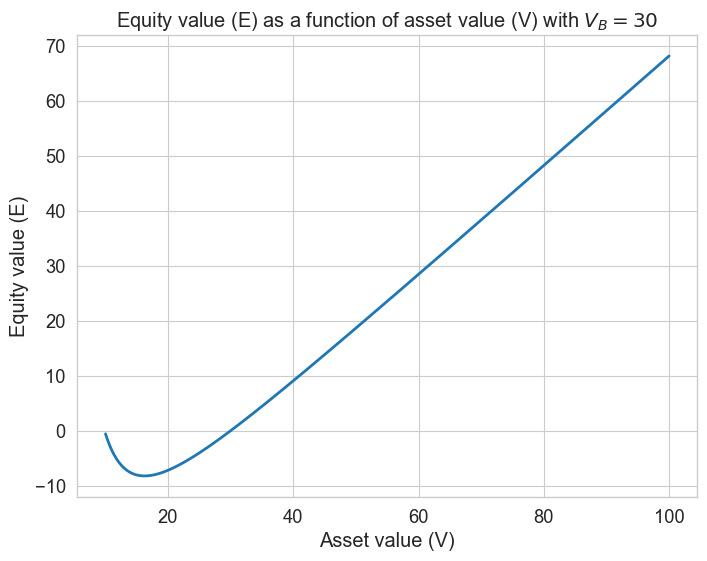

In [7]:
V_B = 30
V = np.linspace(10, 100, 1000)
E = equityValue(V, V_B, C)  # equity value

# plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(V, E, lw=2, label="Equity value")
ax.set_xlabel("Asset value (V)")
ax.set_ylabel("Equity value (E)")
ax.set_title(r"Equity value (E) as a function of asset value (V) with $V_B = 30$")
plt.show()

choose the optimal $V_B$ such that minimum equity is achieved at default: $$\frac{\partial E(V; V_B, C)}{\partial V}\bigg|_{V=V_B} = 0$$ which is equivalent to $$V_B^*(C) = \frac{\lambda_{-}(1-\tau)C}{r(\lambda_{-} - 1)}$$ Since $E(V=V_B; V_B, C) = 0$ for any $V_B$, with optimal selected $V_B^*$, we have $E(V; V_B^*, C) \ge 0$ and the equity is only hit when $V = V_B^*$.

In [5]:
def optimalVB(C):
    return (C / r) * λ_ * (1 - τ) / (λ_ - 1)

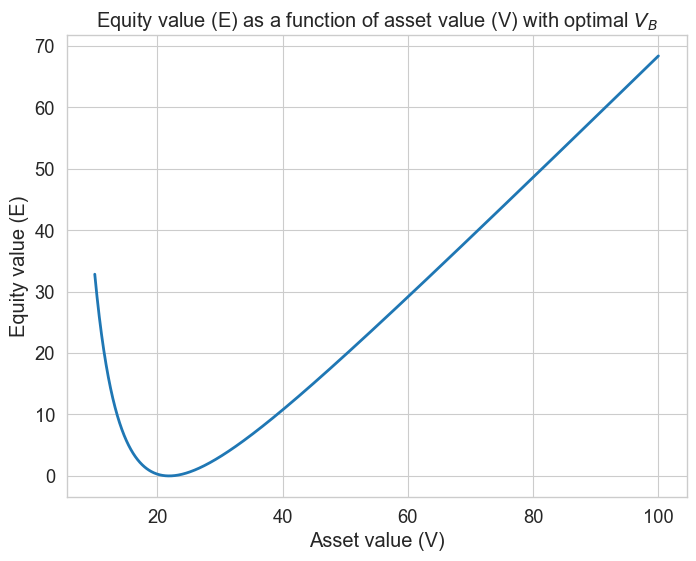

In [11]:
V_B = optimalVB(C)  # optimal V_B
V = np.linspace(10, 100, 1000)
E = equityValue(V, V_B, C)  # equity value

# plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(V, E, lw=2, label="Equity value")
ax.set_xlabel("Asset value (V)")
ax.set_ylabel("Equity value (E)")
ax.set_title("Equity value (E) as a function of asset value (V) with optimal $V_B$")
plt.show()

(b) Now using the optimal $V_B^*(C)$ (slide 24) and plot the total value of the firm
given in slides 23 against coupon C, given the asset value V = 30, 40, 50, 80.

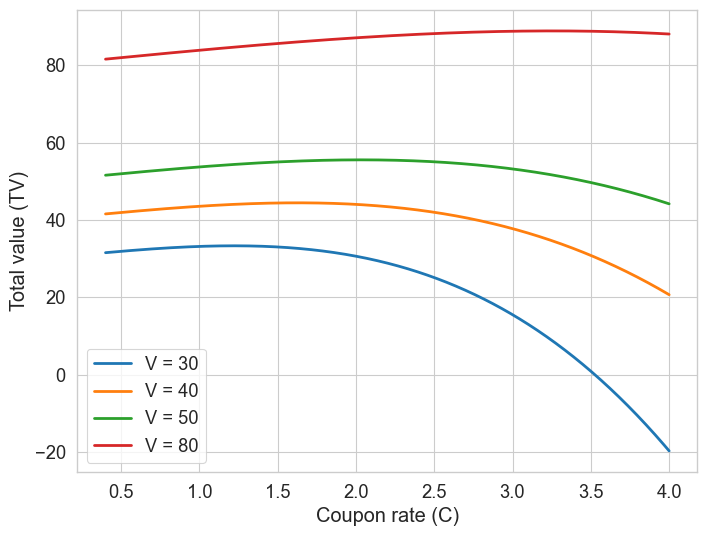

In [16]:
C = np.linspace(0.4, 4, 1000)
V_B = optimalVB(C)

# plot
fig, ax = plt.subplots(figsize=(8, 6))

for V in [30, 40, 50, 80]:
    TV = totalValue(V, V_B, C)
    ax.plot(C, TV, lw=2, label="V = {}".format(V))

ax.set_xlabel("Coupon rate (C)")
ax.set_ylabel("Total value (TV)")
ax.legend(loc=0)
plt.show()

(c) With optimal optimal $C^*(V)$ (slide 24), plot the leverage ratio $D/TV$ against
asset value $V$.

In [18]:
def optimalC(V):
    return ((r * (λ_ - 1) * V) / (λ_ * (1 - τ))) * (((1 - λ_) * τ - λ_ * (1 - τ) * α) / τ)**(1 / λ_)

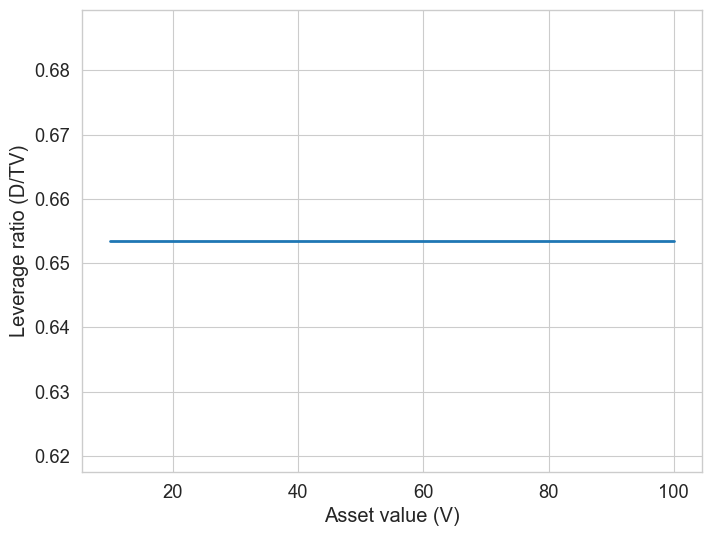

In [19]:
V = np.linspace(10, 100, 1000)
C = optimalC(V)
V_B = optimalVB(C)

leverage = debtValue(V, V_B, C) / totalValue(V, V_B, C)

# plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(V, leverage, lw=2, label="Leverage Ratio")
ax.set_xlabel("Asset value (V)")
ax.set_ylabel("Leverage ratio (D/TV)")
plt.show()

(d) Plot the credit spread against asset value $V$ . Note that the yield for the perpetual debt with coupon $C$ is $y = C/D$.

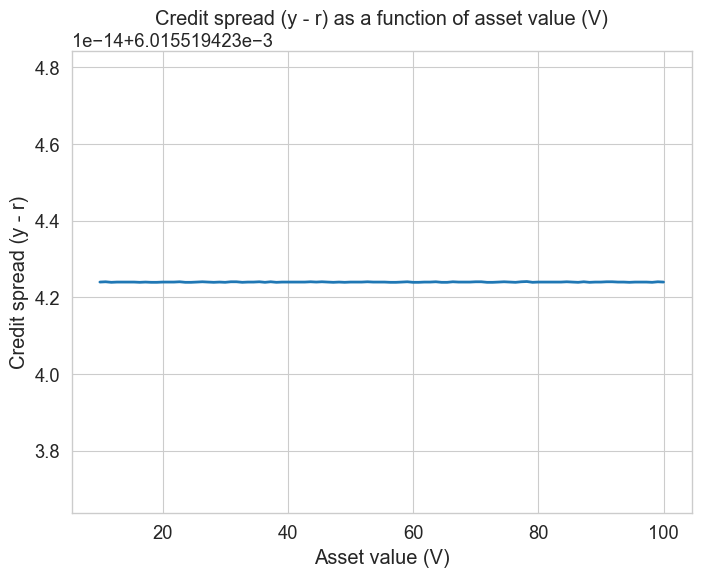

In [24]:
V = np.linspace(10, 100, 100)
C = optimalC(V)
V_B = optimalVB(C)
y = C / debtValue(V, V_B, C)  # credit spread
cs = y - r

# plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(V, cs, lw=2, label="Credit spread")
ax.set_xlabel("Asset value (V)")
ax.set_ylabel("Credit spread (y - r)")
ax.set_title("Credit spread (y - r) as a function of asset value (V)")
plt.show()

(e) Suppose $C^*$ is optimally set at $V = 50$ in the past. For a range of $V$ ,
compare the equity value under this optimal $C^*$ chosen in the past with
the one that the optimal $C$ can be chosen now. Please comment on your
results.

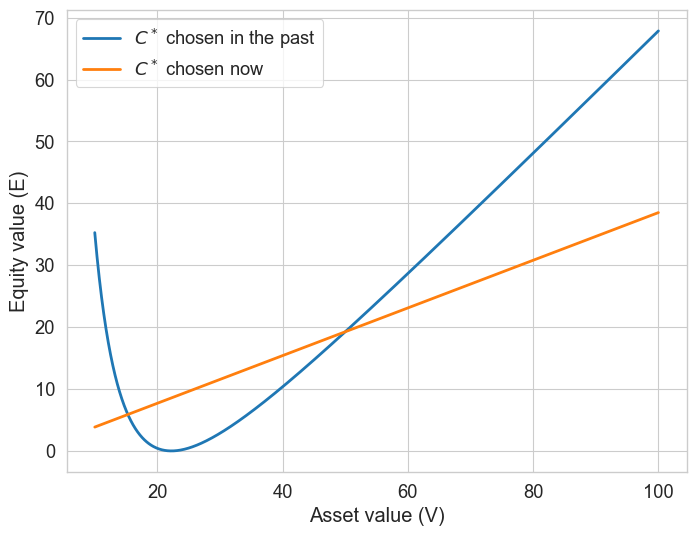

In [25]:
C_past = optimalC(V=50)
V_B_past = optimalVB(C_past)

V = np.linspace(10, 100, 1000)
# equity value with optimal C and V_B chosen in the past
E_past = equityValue(V, V_B_past, C_past)
C_now = optimalC(V)  # optimal C chosen now
V_B_now = optimalVB(C_now)  # optimal V_B chosen now
# equity value with optimal C and V_B chosen now
E_now = equityValue(V, V_B_now, C_now)

# plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(V, E_past, lw=2, label="$C^*$ chosen in the past")
ax.plot(V, E_now, lw=2, label="$C^*$ chosen now")
ax.set_xlabel("Asset value (V)")
ax.set_ylabel("Equity value (E)")
ax.legend(loc=0)
plt.show()

Equity value $E(V; V_B, C)$ becomes a linear function of $V$, if $C$ is optimally chosen for each $V$.

# 2. Reduced-form Models